source : https://www.datacamp.com/tutorial/decision-tree-classification-python

<h3>How does the Decision Tree Algorithm Work?</h3>  
The basic idea behind any decision tree algorithm is as follows:

   1. Select the best attribute using Attribute Selection Measures(ASM)(Information Gain, Gini Index, Gain Ratio) to split the records.
   2. Make that attribute a decision node and breaks the dataset into smaller subsets.
   3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
    * All the tuples belong to the same attribute value.
    * There are no more remaining attributes.
    * There are no more instances.

  

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv('data//diabetes.csv')
pima.columns = col_names
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Feature Selection

Divide columns into **dependant (target)** and **independant (features)** variables

In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

## Splitting Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,random_state=1)

## Building Decision Tree Model

In [5]:
# create decision tree classifier object
clf = DecisionTreeClassifier()

# train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model

Comparing actual test set values and predicted values

In [6]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.683982683982684


## Visualizing Decision Trees

**export_graphviz** function converts decision tree classifier into dot file and **pydotplus** convert this dot file to png or displayable form on Jupyter.

In [7]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
import pydotplus

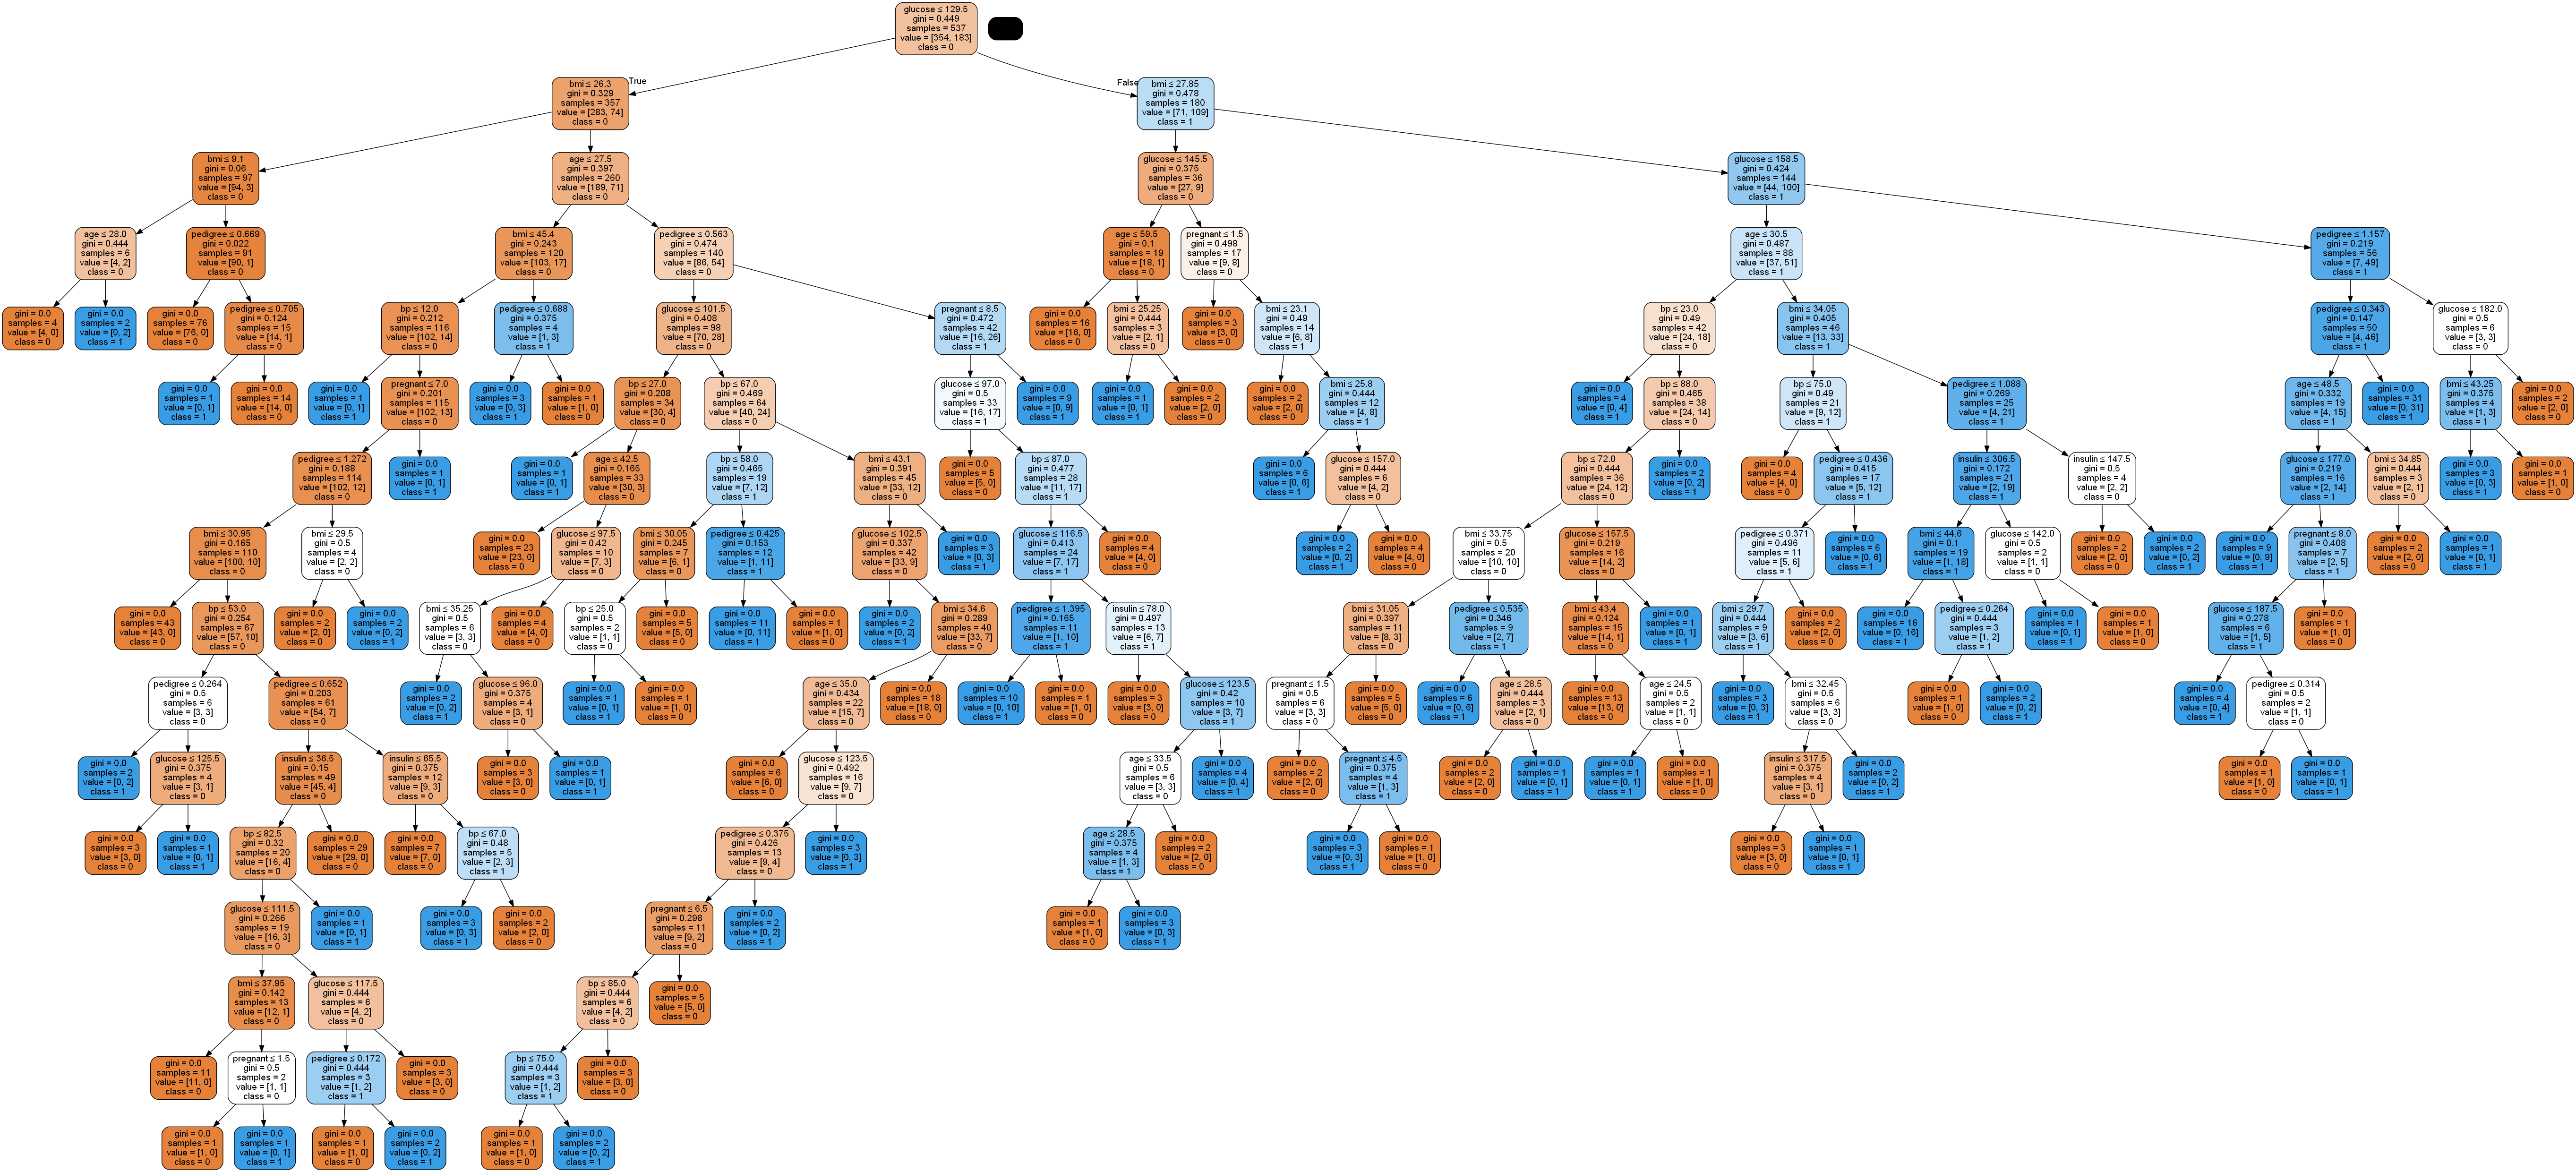

In [8]:
dot_data = StringIO()

export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())